# Fitting Models Exercise 2

## Imports

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a decaying oscillation

For this problem you are given a raw dataset in the file `decay_osc.npz`. This file contains three arrays:

* `tdata`: an array of time values
* `ydata`: an array of y values
* `dy`: the absolute uncertainties (standard deviations) in y

Your job is to fit the following model to this data:

$$ y(t) = A e^{-\lambda t} \cos{\omega t + \delta} $$

First, import the data using NumPy and make an appropriately styled error bar plot of the raw data.

In [5]:
data = np.load('decay_osc.npz')
tdata = data['tdata']
ydata = data['ydata']
dy = data['dy']

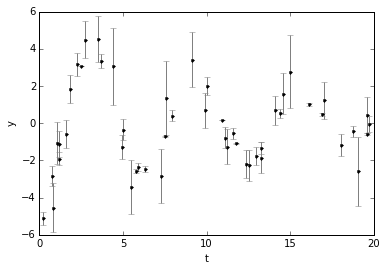

In [6]:
plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='grey')
plt.xlabel('t')
plt.ylabel('y');

In [7]:
assert True # leave this to grade the data import and raw data plot

Now, using `curve_fit` to fit this model and determine the estimates and uncertainties for the parameters:

* Print the parameters estimates and uncertainties.
* Plot the raw and best fit model.
* You will likely have to pass an initial guess to `curve_fit` to get a good fit.
* Treat the uncertainties in $y$ as *absolute errors* by passing `absolute_sigma=True`. 

In [8]:
def model(t,a,lam,omega,delta):
    return a*np.exp(-lam*t)*np.cos(omega*t) + delta

In [11]:
theta_best, theta_cov = opt.curve_fit(model, tdata, ydata, p0=[-5,0,-1,0],sigma=dy, absolute_sigma=True)
Afit = theta_best[0]
lamfit = theta_best[1]
omegafit = theta_best[2]
deltafit = theta_best[3]
print('A = {0:.3f} +/- {1:.3f}'.format(Afit, theta_cov[0,0]))
print('lambda = {0:.3f} +/- {1:.3f}'.format(lamfit, theta_cov[1,1]))
print('omega = {0:.3f} +/- {1:.3f}'.format(omegafit, theta_cov[2,2]))
print('delta = {0:.3f} +/- {1:.3f}'.format(deltafit, theta_cov[3,3]))

A = -4.896 +/- 0.004
lambda = 0.094 +/- 0.000
omega = -1.001 +/- 0.000
delta = 0.027 +/- 0.000


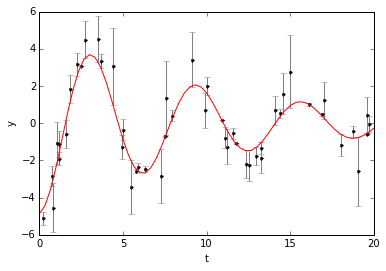

In [10]:
tfit = np.linspace(0,20,61)
yfit = model(tfit,Afit,lamfit,omegafit,deltafit)

plt.errorbar(tdata, ydata, dy, fmt='.k', ecolor='grey')
plt.plot(tfit, yfit, 'r-')
plt.xlabel('t')
plt.ylabel('y');

In [8]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors